In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table 

In [2]:
data = pd.read_parquet("data/06_calculate_distance.parquet")
data

,id,question,context,answers,source,th_aug,th_fasttext_aug,th_llm_gec_aug,th_llm_paraphrase_aug,th_ltw2v_aug,...,dis_ltw2v_aug,dis_qcpg_0.2_aug,dis_qcpg_0.2_llm_gec_aug,dis_qcpg_0.5_aug,dis_qcpg_0.5_llm_gec_aug,dis_qcpg_0.8_aug,dis_qcpg_0.8_llm_gec_aug,dis_thai2fit_aug,dis_thai2trans_aug,dis_wordnet_aug
0,82c589fda5d3007be968f303e04a9ac58953299a64a5be...,พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['3 ธันวาคม พ.ศ. 2533'], 'answer_star...",iapp,Phatthira Sarutpong Phokin วันเดือนปีเกิดคืออะไร?,พัณณ์ธีภ ศรุติวัฒน์2โภคิน เกิดวันที่ไหร่?,วันเดือนปีเกิดของ Phatthira Sarutpong Phokin ค...,Phatthira Sarutpong Phokin คุณช่วยจัดเตรียมวัน...,พัทธ์ธีรา ศรุติพงษ์โภคิน ทำให้เกิดวันอาทิตย์เท...,...,0.379822,0.457964,0.442132,0.442132,0.664607,0.373971,0.391374,0.213284,0.000000,9.606189e-02
1,6483e513603bd34b6f23a5fbe9e1c1db194ce4f4365a69...,พัทธ์ธีรา ศรุติพงศ์โภคิน มีฃื่อเล่นว่าอะไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['อร'], 'answer_start': [68], 'answer...",iapp,Phatthira Sarutpong Phokin คุณกำลังเล่นอะไรอยู่?,พัทธ์ธีรา ศิษฎพงศ์อรัช dcccxxxii ในPSPเล่นว่าอ...,คุณกำลังเล่นอะไร Phatthira Sarutpong Phokin?,Phatthira Sarutpong Phokin คุณกำลังเล่นเกมอะไร...,พัทธ์ธีรา ศรุติพงษ์โภคิน มีฃื่อเล่นว่าอะไร?,...,0.028428,0.512295,0.604564,0.552465,0.590820,0.583206,0.645776,0.232190,0.000000,0.000000e+00
2,09fc57198420c10d8cd67154a154cca37fdcde53ec894a...,พัทธ์ธีรา ศรุติพงศ์โภคิน ทำอาชีพอะไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['นักแสดงหญิงชาวไทย'], 'answer_start'...",iapp,อาชีพของ Phatthira Teerathiyapong Phokin คืออะไร?,รพนธ์ธีคาต ศรุติวรรณ2โภคิน ทำอาชีพอะไร4?,อาชีพของ Phatthira Teerathiyapong Phokin คืออะไร?,อาชีพของ Phatthira Teerathiyapong Phokin คืออะไร?,พัทธ์ธีรา ศรุติพงษ์โภคิน ทำอาชีพอะไร?,...,0.017806,0.408607,0.408607,0.346143,0.346143,0.328919,0.328919,0.150410,0.000000,0.000000e+00
3,7b2f336d3dbc29c6fb1edf7f4988f968ed0a1272fe8aff...,พัทธ์ธีรา ศรุติพงศ์โภคิน จบการศึกษาจากประเทศอะไร?,พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. ...,"{'text': ['ประเทศนิวซีแลนด์'], 'answer_start':...",iapp,Phatthira Sarutpong Phokin จบการศึกษาจากประเทศ...,พัทธ์ธีรา ตอัตถพงศ์ฯกุล1 จบการศึกษาจากภ.ต่างอะ...,Phatthira Sarutpong Phokin จบการศึกษาจากประเทศใด?,Phatthira Sarutpong Phokin จากประเทศใดจากการศึ...,พัทธ์ธีรา ศรุติพงษ์โภคิน จบการศึกษาจากในประเทศ...,...,0.044393,0.600420,0.717404,0.606477,0.717404,0.433692,0.523367,0.155829,0.009204,1.820072e-01
4,50c66c986cdf19b60f36da1b89137a6ceb4f11aa9ed0e9...,บิดาของคลีโอพัตราเป็นใคร?,คลีโอพัตราที่ 7 ฟิโลพาเธอร์ (กรีก: Κλεοπάτρα θ...,"{'text': ['ทอเลมีที่ 12 ออเลติส'], 'answer_sta...",iapp,พ่อของคลีโอพัตราคือใคร?,บิดาของมเนสโอพัตตกฺขหลายๆใคร?,พ่อของคลีโอพัตราคือใคร?,พ่อผู้ให้กำเนิดของคลีโอพัตราคือใคร?,มารดาของคลีโอพัตราเป็นใคร?,...,0.180941,0.238710,0.388979,0.151006,0.443043,0.097685,0.097685,0.150196,0.156331,8.621460e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,e780cc4812dd88f21ec7f0152905b15588d1a6faab66d2...,หนังสือการ์ตูนชานะ นักรบเนตรอัคคี มีกี่เล่ม?,นิยาย ชานะ นักรบเนตรอัคคี แต่งโดย ยาชิจิโร ทาค...,"{'text': ['22', '26'], 'answer_start': [267, 9...",tydiqa,หนังสือการ์ตูนนักรบดับเพลิงกี่คน?,หนังสือDIYการ์ตูนPokemonชานะ อุดมการณ์ถ.ทิพยเน...,นักรบดับเพลิงมีกี่คนในหนังสือการ์ตูน?,ในหนังสือการ์ตูนมีนักรบดับเพลิงกี่คน?,หนังสือการ์ตูนชาน่ะ นักรบเนตรอัคคี มีกี่เล่ม?,...,0.038205,0.459041,0.345795,0.330124,0.345795,0.363513,0.284700,0.063899,0.012518,1.700147e-01
16976,dd424979403f3909773a832c4d83818e564fe7bfeb4f38...,ไบโอช็อก อินฟินิต เปิดตัวครั้งแรกเมื่อไหร่?,ไบโอช็อก อินฟินิต (English: BioShock Infinite)...,"{'text': ['26 มีนาคม พ.ศ. 2556', '26 มีนาคม พ....",tydiqa,BioShock Infin เปิดตัวครั้งแรกเมื่อใด?,ไบโอมีช๊อค อร์เนชยมีฟิตี้07ต เปิดตัวครั้งแรกเม...,BioShock Infinite เปิดตัวครั้งแรกเมื่อใด?,การเปิดตัวครั้งแรกของ BioShock Infinite คือเมื...,ไบโอช็อค อินฟินิต เผยโฉมเป็นครั้งแรกเมื่อไร?,...,0.168088,0.609325,0.713147,0.475034,0.686884,0.482104,0.602809,0.097

In [3]:
# Get all numerical columns in data
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['dis_aug', 'dis_fasttext_aug', 'dis_llm_gec_aug',
       'dis_llm_paraphrase_aug', 'dis_ltw2v_aug', 'dis_qcpg_0.2_aug',
       'dis_qcpg_0.2_llm_gec_aug', 'dis_qcpg_0.5_aug',
       'dis_qcpg_0.5_llm_gec_aug', 'dis_qcpg_0.8_aug',
       'dis_qcpg_0.8_llm_gec_aug', 'dis_thai2fit_aug', 'dis_thai2trans_aug',
       'dis_wordnet_aug'],
      dtype='object')

# Distance Statistics

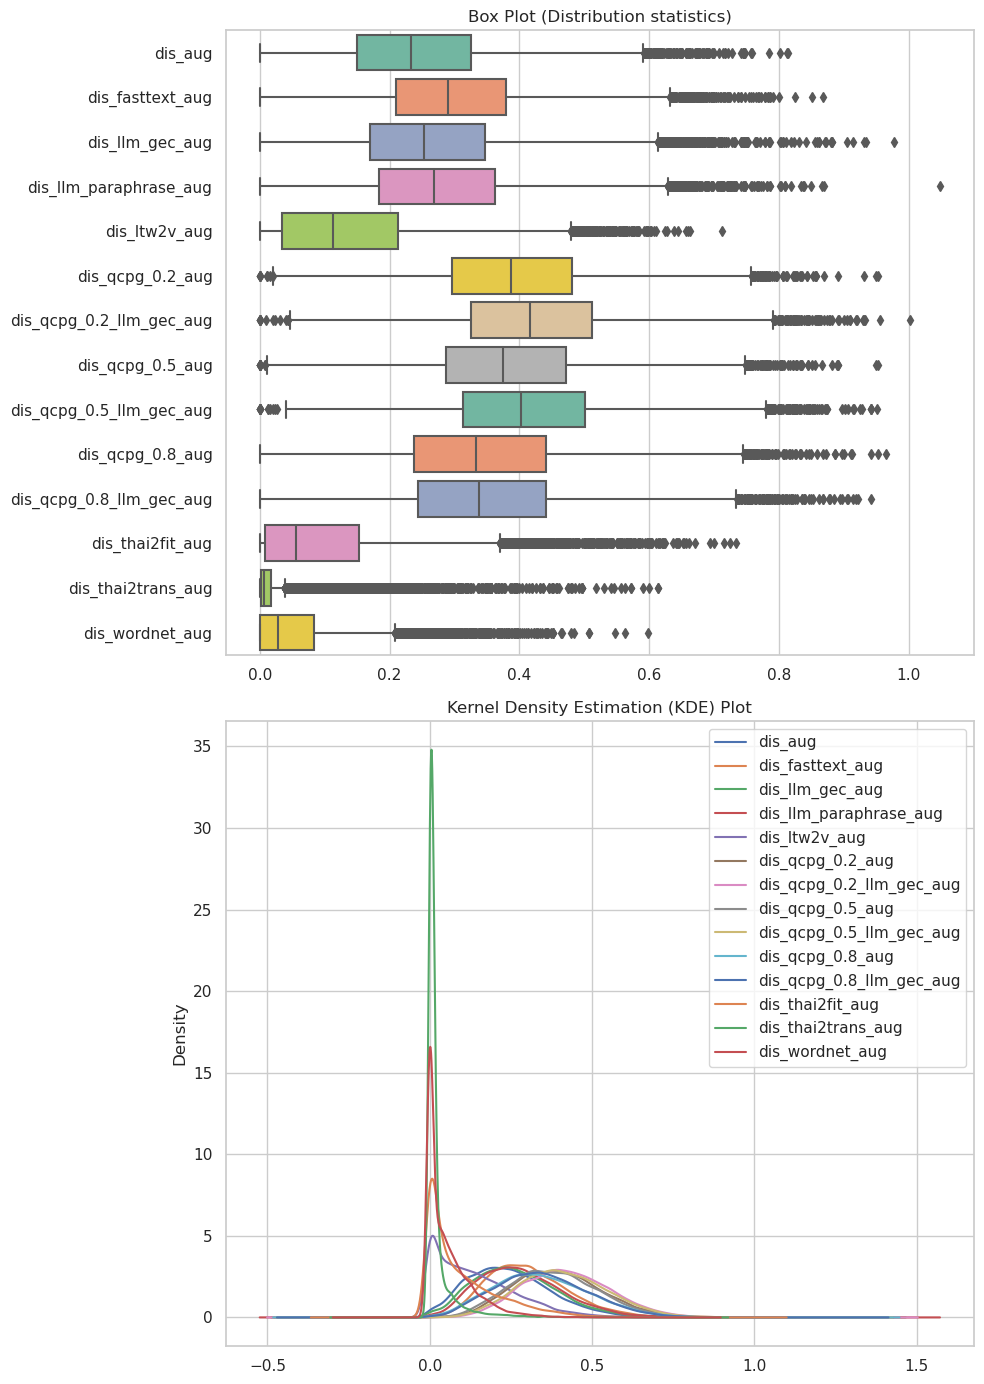

In [4]:
# Plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 14))

# First plot with Boxplot for distribution
sns.boxplot(data=data[numerical_columns], orient='h', palette="Set2", ax=axs[0])
axs[0].set_title('Box Plot (Distribution statistics)')

# Second plot with KDE plots for each data set
data[numerical_columns].plot(kind='density', ax=axs[1])
axs[1].set_title('Kernel Density Estimation (KDE) Plot')

plt.tight_layout()
plt.show()

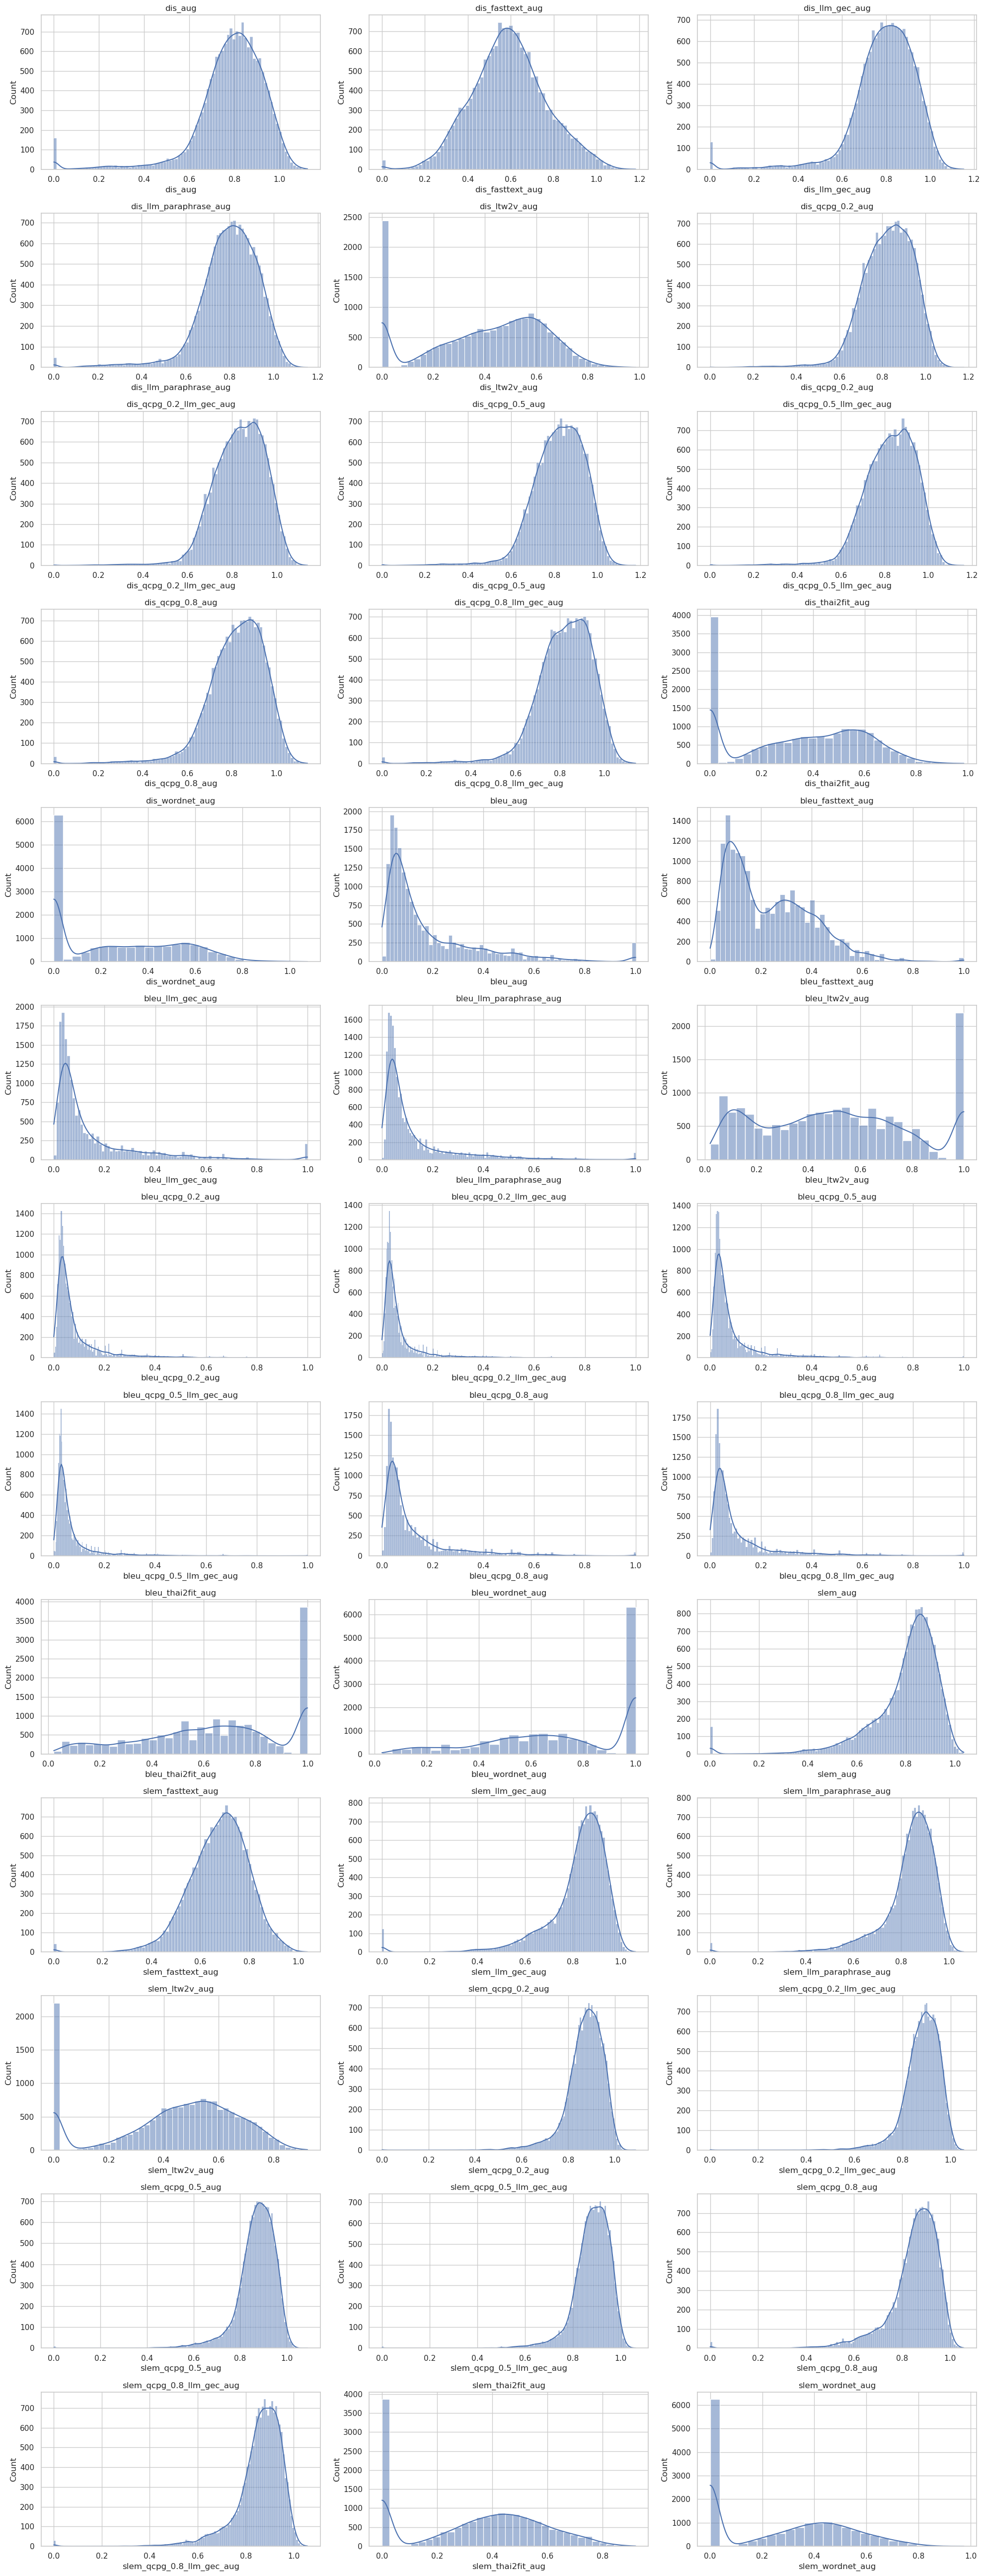

In [5]:
num_datasets = len(numerical_columns)

# Calculate the number of rows and columns to create a grid
num_rows = int(np.ceil(num_datasets / 3.))  # Change divisor to control number of columns
num_cols = 3  # Change this to control number of columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))

for ind, column in enumerate(numerical_columns):
    i = ind // num_cols
    j = ind % num_cols
    sns.histplot(data[column], kde=True, ax=axs[i, j])
    axs[i, j].set_title(column)

# Remove empty subplots
if num_datasets % num_cols != 0:
    for idx in range(num_datasets, num_rows*num_cols):
        fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

/tmp/ipykernel_137844/2659006469.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), fontsize=22)
/tmp/ipykernel_137844/2659006469.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=22)


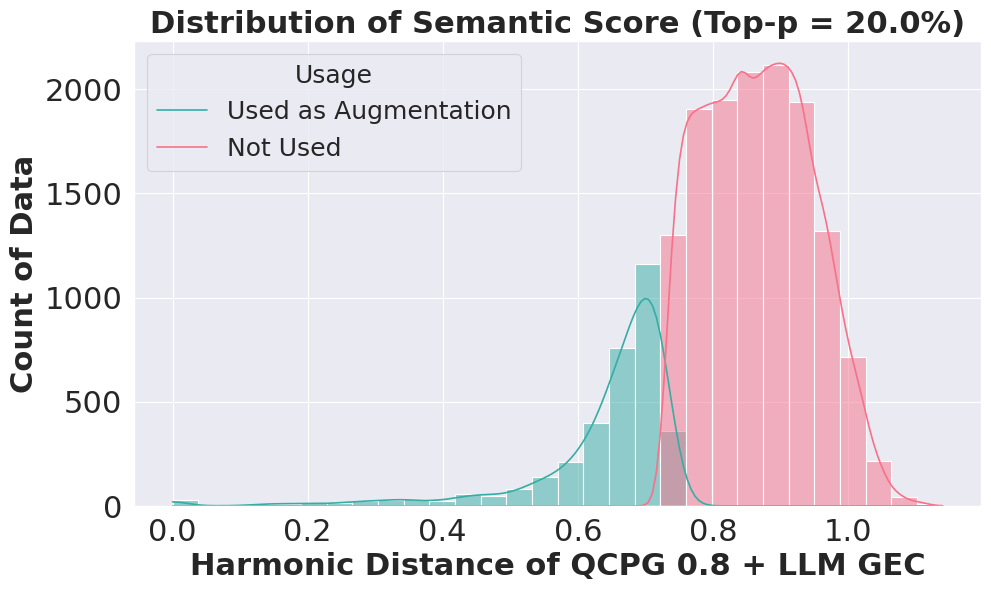

In [34]:
df = data.copy()

# Pull out Harmonic Distance of qcpg 0.8 + llm gec augmentation
col_to_use = 'dis_qcpg_0.8_llm_gec_aug'


# Hyperparameter to select the portion of the data (e.g., 0.2 for 20%)
p = 0.2

# Sort the values and find the threshold for the given portion
threshold = df[col_to_use].quantile(p)

# Create a new column to label the selected portion of the data
df['highlight'] = (df[col_to_use] <= threshold).astype(int)

# Create a color palette with two colors
palette = sns.color_palette("husl", 2)

# Create a figure and axis to customize the plot size
sns.set_theme()
sns.set_context("paper")
fig, ax = plt.subplots(figsize=(10, 6))


# Plot the distribution with the custom palette and KDE
sns_plot = sns.histplot(data=df, x=col_to_use, hue='highlight', palette=palette, bins=30, kde=True, ax=ax)

# Customizing the plot with informative labels and title
plt.xlabel('Harmonic Distance of QCPG 0.8 + LLM GEC')
plt.ylabel('Count of Data')
plt.title('Distribution of Semantic Score (Top-p = ' + str(p * 100) + '%)')

# Bold the xlabel, ylabel, and title
ax.set_xlabel(ax.get_xlabel(), weight='bold')
ax.set_ylabel(ax.get_ylabel(), weight='bold')
ax.set_title(ax.get_title(), weight='bold')

# Modify legend title and labels
sns_plot.legend(title='Usage', labels=['Used as Augmentation', 'Not Used'], fontsize=18, title_fontsize=18)

# Set font size to 22
sns_plot.tick_params(labelsize=22)
sns_plot.set_title(sns_plot.get_title(), fontsize=22, weight='bold')
sns_plot.set_xlabel(sns_plot.get_xlabel(), fontsize=22, weight='bold')
sns_plot.set_ylabel(sns_plot.get_ylabel(), fontsize=22,  weight='bold')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), fontsize=22)
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), fontsize=22)

# Make layout as tight as possible
plt.tight_layout()

# Show the plot
plt.savefig('../results/hm_ex_dist.png', dpi=300)
plt.show()

## MRC Error Analysis

In [16]:
filtered_data = data[(data["source"] != "xquad") & (data["source"] != "tydiqa")]
casestudy1_df = filtered_data[["question", "th_qcpg_0.8_llm_gec_aug", "th_qcpg_0.2_aug", "dis_qcpg_0.8_llm_gec_aug", "dis_qcpg_0.2_aug"]].copy()
casestudy1_df

,question,th_qcpg_0.8_llm_gec_aug,th_qcpg_0.2_aug,dis_qcpg_0.8_llm_gec_aug,dis_qcpg_0.2_aug
0,พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร?,วันเดือนปีเกิดของ Phatthira Sarutin คืออะไร?,วันเดือนปีเกิดของภูเก็ตข่านจูเนียร์คืออะไร?,0.642690,0.942305
1,พัทธ์ธีรา ศรุติพงศ์โภคิน มีฃื่อเล่นว่าอะไร?,คุณกำลังเล่นอะไรใน Phatthira Sarutong pH?,คุณกำลังเล่นอะไรเมื่อ Sarutina กำลังเล่นอยู่?,0.867701,0.712166
2,พัทธ์ธีรา ศรุติพงศ์โภคิน ทำอาชีพอะไร?,อาชีพของ phatthira teeratha phi คืออะไร?,อาชีพนักฟิสิกส์คืออะไร?,0.750872,0.896181
3,พัทธ์ธีรา ศรุติพงศ์โภคิน จบการศึกษาจากประเทศอะไร?,Phatthira Sarutpong Phokin ประเทศอะไร?,Phatthira Sarutpah Phoenix จบการศึกษา?,0.648129,0.723428
4,บิดาของคลีโอพัตราเป็นใคร?,พ่อคลีโอพัตราสคือใคร?,ชื่อพ่อคลีโอพัตราสคืออะไร?,0.794606,0.716229
...,...,...,...,...,...
11272,เรวิญานันท์ ทาเกิด หรือ เบญ บ้านเกิดอยู่จังหวั...,สถานที่เกิดของ Revananas คืออะไร?,สถานที่เกิดของฮีโร่ยุคฟื้นฟูศิลปวิทยาคืออะไร?,0.611482,0.977200
11273,กูดฟิลลิงเป็นเพลงจากอัลบั้มใด?,อัลบั้ม Gud Philippines คืออะไร?,อัลบั้มแรกของ Gud Philings คืออะไร?,0.995716,0.869988
11274,กบ ปภัสรา ชีวิตส่วนตัวได้สมรสกับนักการเมืองท่า...,Kob Papasara คือใครและเธอแต่งงานกับใคร?,Kob Papasara แต่งงานกับนักการเมือง?,0.850935,0.830980
11275,พ่อของปีเตอร์ ดรักเกอร์ ทำอาชีพอะไร?,พ่อของปีเตอร์ทำอะไร?,Peter Drews Fathers ชื่ออะไร?,0.903803,0.993041


In [17]:
import torch
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
import numpy as np


def embed_sentences(sentences, model, tokenizer, batch_size=32):
    embeddings = []
    
    # Check if GPU is available and move the model to GPU if possible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Tokenize all sentences at once
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=128)

    # Create a DataLoader
    dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
    dataloader = DataLoader(dataset, batch_size=batch_size)

    # Embedding in batches
    for batch in tqdm(dataloader):
        input_ids, attention_mask = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        
        # Move the embeddings back to CPU if you wish to convert them to numpy
        cls_embeddings = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
        embeddings.extend(cls_embeddings)
    
    return embeddings

# Initialize BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased')
model = AutoModel.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased')

list1 = casestudy1_df['question'].tolist()
list2 = casestudy1_df['th_qcpg_0.8_llm_gec_aug'].tolist()
list3 = casestudy1_df['th_qcpg_0.2_aug'].tolist()

# Embed the sentences
embeddings1 = embed_sentences(list1, model, tokenizer)
embeddings2 = embed_sentences(list2, model, tokenizer)
embeddings3 = embed_sentences(list3, model, tokenizer)

# Combine all embeddings for UMAP
all_embeddings = embeddings1 + embeddings2 + embeddings3

# Perform UMAP dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42)
reduced_embeddings = umap_model.fit_transform(all_embeddings)

# Split the reduced embeddings back into two lists
reduced1 = reduced_embeddings[:len(list1), :]
reduced2 = reduced_embeddings[len(list1):len(list1)+len(list2), :]
reduced3 = reduced_embeddings[len(list1)+len(list2):, :]


Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/353 [00:00<?, ?it/s]

  0%|          | 0/353 [00:00<?, ?it/s]

  0%|          | 0/353 [00:00<?, ?it/s]

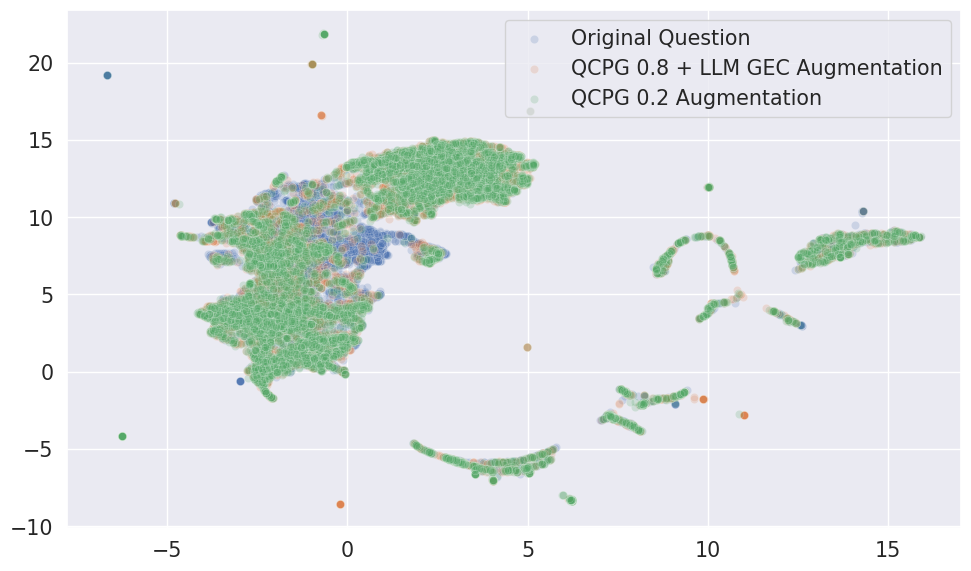

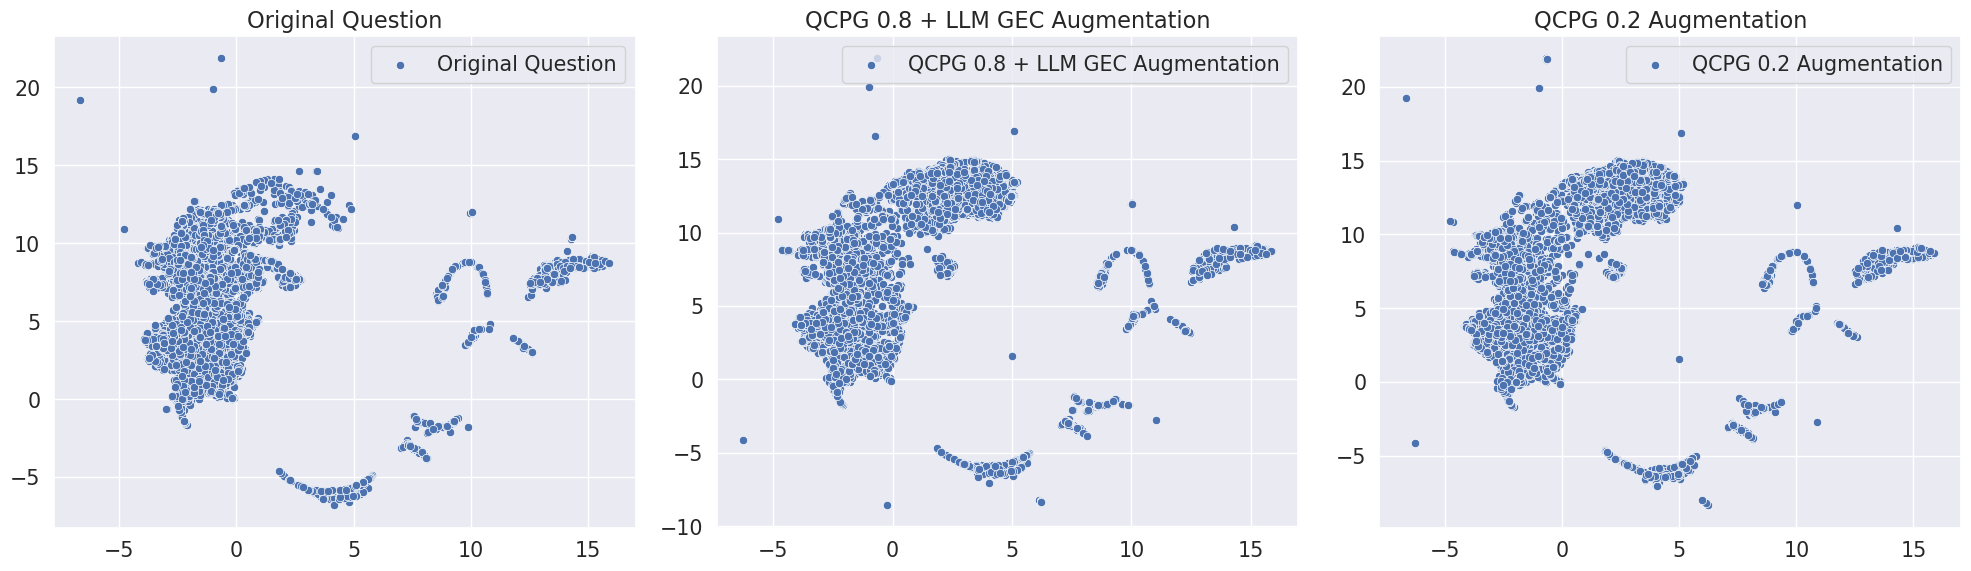

In [18]:
# Plot the reduced embeddings with seaborn
sns.set_theme()
sns.set_context("paper")
sns.set(font_scale=1.35)
fig, ax = plt.subplots(figsize=(10, 6))

# Make sure to make all plots visible with alpha < 1
sns.scatterplot(x=reduced1[:, 0], y=reduced1[:, 1], alpha=0.2, label='Original Question')
sns.scatterplot(x=reduced2[:, 0], y=reduced2[:, 1], alpha=0.2, label='QCPG 0.8 + LLM GEC Augmentation')
sns.scatterplot(x=reduced3[:, 0], y=reduced3[:, 1], alpha=0.2, label='QCPG 0.2 Augmentation')
plt.legend()
plt.tight_layout()
plt.show()

# new plot with 3 subplots instead
sns.set_theme()
sns.set_context("paper")
sns.set(font_scale=1.35)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.scatterplot(x=reduced1[:, 0], y=reduced1[:, 1], alpha=1, label='Original Question', ax=axs[0])
sns.scatterplot(x=reduced2[:, 0], y=reduced2[:, 1], alpha=1, label='QCPG 0.8 + LLM GEC Augmentation', ax=axs[1])
sns.scatterplot(x=reduced3[:, 0], y=reduced3[:, 1], alpha=1, label='QCPG 0.2 Augmentation', ax=axs[2])
axs[0].set_title('Original Question')
axs[1].set_title('QCPG 0.8 + LLM GEC Augmentation')
axs[2].set_title('QCPG 0.2 Augmentation')
plt.tight_layout()
plt.show()

In [19]:
casestudy1_df["difference_dis"] = abs(casestudy1_df["dis_qcpg_0.8_llm_gec_aug"] - casestudy1_df["dis_qcpg_0.2_aug"])
casestudy1_df

,question,th_qcpg_0.8_llm_gec_aug,th_qcpg_0.2_aug,dis_qcpg_0.8_llm_gec_aug,dis_qcpg_0.2_aug,difference_dis
0,พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร?,วันเดือนปีเกิดของ Phatthira Sarutin คืออะไร?,วันเดือนปีเกิดของภูเก็ตข่านจูเนียร์คืออะไร?,0.642690,0.942305,0.299616
1,พัทธ์ธีรา ศรุติพงศ์โภคิน มีฃื่อเล่นว่าอะไร?,คุณกำลังเล่นอะไรใน Phatthira Sarutong pH?,คุณกำลังเล่นอะไรเมื่อ Sarutina กำลังเล่นอยู่?,0.867701,0.712166,0.155535
2,พัทธ์ธีรา ศรุติพงศ์โภคิน ทำอาชีพอะไร?,อาชีพของ phatthira teeratha phi คืออะไร?,อาชีพนักฟิสิกส์คืออะไร?,0.750872,0.896181,0.145309
3,พัทธ์ธีรา ศรุติพงศ์โภคิน จบการศึกษาจากประเทศอะไร?,Phatthira Sarutpong Phokin ประเทศอะไร?,Phatthira Sarutpah Phoenix จบการศึกษา?,0.648129,0.723428,0.075299
4,บิดาของคลีโอพัตราเป็นใคร?,พ่อคลีโอพัตราสคือใคร?,ชื่อพ่อคลีโอพัตราสคืออะไร?,0.794606,0.716229,0.078377
...,...,...,...,...,...,...
11272,เรวิญานันท์ ทาเกิด หรือ เบญ บ้านเกิดอยู่จังหวั...,สถานที่เกิดของ Revananas คืออะไร?,สถานที่เกิดของฮีโร่ยุคฟื้นฟูศิลปวิทยาคืออะไร?,0.611482,0.977200,0.365718
11273,กูดฟิลลิงเป็นเพลงจากอัลบั้มใด?,อัลบั้ม Gud Philippines คืออะไร?,อัลบั้มแรกของ Gud Philings คืออะไร?,0.995716,0.869988,0.125728
11274,กบ ปภัสรา ชีวิตส่วนตัวได้สมรสกับนักการเมืองท่า...,Kob Papasara คือใครและเธอแต่งงานกับใคร?,Kob Papasara แต่งงานกับนักการเมือง?,0.850935,0.830980,0.019955
11275,พ่อของปีเตอร์ ดรักเกอร์ ทำอาชีพอะไร?,พ่อของปีเตอร์ทำอะไร?,Peter Drews Fathers ชื่ออะไร?,0.903803,0.993041,0.089237


In [20]:
casestudy1_df[casestudy1_df["dis_qcpg_0.8_llm_gec_aug"] > 0.1].sort_values(by=["difference_dis"], ascending=False).head(50)

,question,th_qcpg_0.8_llm_gec_aug,th_qcpg_0.2_aug,dis_qcpg_0.8_llm_gec_aug,dis_qcpg_0.2_aug,difference_dis
7108,ประเทศไทยมีกี่จังหวัด?,ในประเทศไทยมีกี่จังหวัด?,ประเทศไทยมีกี่จังหวัด?,0.898756,2.384186e-07,0.898755
6879,ระบบการปกครองใน 1984 คืออะไร?,ระบบการบริหารในปี 1984 คืออะไร?,ระบบการบริหารในประเทศคืออะไร?,0.159680,1.011119e+00,0.851439
18,พระราชวังเซนต์เจมส์คืออะไร?,พระราชวังเซนต์เจมส์ชื่ออะไร?,พระราชวังเซนต์เจมส์คืออะไร?,0.778729,0.000000e+00,0.778729
8011,บริษัทใดได้ซื้อหุ้นจำนวนกว่า 64% ของ Agatha Ch...,บริษัท ใดซื้อมากกว่า 64% ของ Agatha Christie ใ...,ชื่อของ บริษัท ที่เป็นเจ้าของผู้ถือหุ้นทั้งหมด...,0.198345,9.224693e-01,0.724124
10622,ประเทศใดเป็นเจ้าภาพจัดการแข่งขันกีฬาเฟสปิก ครั...,ประเทศใดเป็นเจ้าภาพการแข่งขันกีฬาโอลิมปิกครั้ง...,ประเทศใดเป็นเจ้าภาพการแข่งขันกีฬาโอลิมปิกครั้ง...,0.186115,8.857658e-01,0.699651
6142,สรุปเหรียญเอเชียนเกมส์ 1986 เป็นรายการของสภาโอ...,ตามจำนวนของการแข่งขันกีฬาโอลิมปิกเอเชียในการจั...,การจัดอันดับของการแข่งขันกีฬาโอลิมปิกเอเชียในโ...,0.323474,1.009431e+00,0.685958
2972,SB มาจากอะไร?,คุณช่วยให้ข้อมูลหรือบริบทเพิ่มเติมได้ไหม?,SB หมายถึงอะไร?,1.012536,3.349030e-01,0.677632
10064,เอสเอ็มสเตชัน หรือ SM STATION เป็นโปรเจ็กต์การ...,โครงการ SM Station หรือ SM Station คืออะไรซึ่ง...,โครงการที่ปล่อยเพลงผ่านระบบสตรีมมิ่งจากค่ายเพล...,0.261345,9.289852e-01,0.667641
2633,ผู้ร้ายนำ Pll ไปใช้ทำอะไรได้บ้าง?,วายร้ายสามารถใช้ PLL เพื่ออะไรได้บ้าง?,จุดประสงค์ของวายร้ายคืออะไร?,0.271347,9.265751e-01,0.655228
9476,ประเทศใดเป็นเจ้าภาพจัดการแข่งขันกีฬาเอเชียนเกม...,ประเทศใดเป็นเจ้าภาพการแข่งขันเอเชียน 1996?,โฮสต์ของการแข่งขันกีฬาโอลิมปิกเอเชียเป็นประเทศใด?,0.278308,9.205846e-01,0.642277


In [42]:
selected_ids = [0, 11272, 2633, 10997]
to_export = casestudy1_df.iloc[selected_ids][["question", "th_qcpg_0.8_llm_gec_aug", "th_qcpg_0.2_aug"]]
to_export = to_export.rename(columns={"question": "Original Question", "th_qcpg_0.8_llm_gec_aug": "LLM GEC + QCPG(0.8)", "th_qcpg_0.2_aug": "QCPG(0.2) Augmentation"})
to_export = to_export.reset_index(drop=True)

to_export.to_csv("temp.csv", index=False)

# ReQA Analysis

In [17]:
reqa_results = pd.read_csv("results/07_benchmark_reqa.csv")
reqa_results

,source,name,top_1,top_5,top_10,norm_top_1,norm_top_5,norm_top_10,mrr_score,data_length
0,iapp,original,42,172,223,0.005812,0.023803,0.030861,0.012441,7226
1,iapp,th_aug,197,356,395,0.027263,0.049267,0.054664,0.035851,7226
2,iapp,th_fasttext_aug,522,958,1081,0.072239,0.132577,0.149599,0.097408,7226
3,iapp,th_llm_gec_aug,166,306,351,0.022973,0.042347,0.048575,0.030814,7226
4,iapp,th_llm_paraphrase_aug,155,293,335,0.021450,0.040548,0.046360,0.029291,7226
5,iapp,th_ltw2v_aug,1288,2138,2292,0.178245,0.295876,0.317188,0.226710,7226
6,iapp,th_qcpg_0.2_aug,77,156,194,0.010656,0.021589,0.026847,0.015277,7226
7,iapp,th_qcpg_0.2_llm_gec_aug,61,149,184,0.008442,0.020620,0.025464,0.013509,7226
8,iapp,th_qcpg_0.5_aug,86,172,213,0.011901,0.023803,0.029477,0.016990,7226
9,iapp,th_qcpg_0.5_llm_gec_aug,71,162,202,0.009826,0.022419,0.027955,0.015016,7226


In [25]:
reqa_results.sort_values('norm_top_1', ascending=False)

,source,name,top_1,top_5,top_10,norm_top_1,norm_top_5,norm_top_10,mrr_score,data_length
27,thaiqa,th_wordnet_aug,1803,2045,2099,0.445075,0.504814,0.518144,0.472066,4051
26,thaiqa,th_thai2fit_aug,1465,1767,1852,0.361639,0.436189,0.457171,0.393940,4051
55,tydiqa,th_wordnet_aug,1495,1844,1918,0.330533,0.407694,0.424055,0.363046,4523
19,thaiqa,th_ltw2v_aug,1277,1623,1748,0.315231,0.400642,0.431498,0.354064,4051
13,iapp,th_wordnet_aug,2134,2916,3044,0.295322,0.403543,0.421257,0.341590,7226
54,tydiqa,th_thai2fit_aug,1230,1744,1854,0.271943,0.385585,0.409905,0.319754,4523
41,xquad,th_wordnet_aug,303,340,350,0.256780,0.288136,0.296610,0.269681,1180
47,tydiqa,th_ltw2v_aug,953,1408,1529,0.210701,0.311298,0.338050,0.254328,4523
12,iapp,th_thai2fit_aug,1384,2023,2193,0.191531,0.279961,0.303487,0.229973,7226
5,iapp,th_ltw2v_aug,1288,2138,2292,0.178245,0.295876,0.317188,0.226710,7226
